# **Lab 3 (b)**
### Weightage 3.6%
# Convolutional Neural Networks
---
Dataset used: Cats Vs. Dogs

---



Maximum Points in the Lab: 90

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **March 20th 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In this part of your Lab 3, you will be using Convolutional Neural Network to classify whether a given image contains a Cat or a Dog. You can use the tensorflow package for this implementation. The Cats and Dogs dataset from the famous Kaggle contest which is filtered and available at tensorflow can be used.

In [ ]:
# Import the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import random
from sklearn.metrics import confusion_matrix

# If using Google Colab, use the following package to display the image
# If running on your local system, cv2.imshow shall work fine
# If running on your local system please comment the line below
from google.colab.patches import cv2_imshow

# Data loading and Preprocessing

---


The following blocks downloads the dataset stored at tensorflow and extracts them to be used to train the CNN model. **Please don't make any changes to these blocks below.**

In [ ]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract = True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 1s 0us/step


The dataset has the following directory structure:

<pre>
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

Extract the paths of these directories onto different variables to facilitate accessing the dataset and thereby training the model.

In [ ]:
train_dir_path = os.path.join(PATH, 'train')
validation_dir_path = os.path.join(PATH, 'validation')

train_cats_dir_path = os.path.join(train_dir_path, 'cats')  
train_dogs_dir_path = os.path.join(train_dir_path, 'dogs') 
validation_cats_dir_path = os.path.join(validation_dir_path, 'cats')  
validation_dogs_dir_path = os.path.join(validation_dir_path, 'dogs')  

## Create a labelled test set from the validation set
As you would have seen we have only training and validation sets with labels as the ground truth labels for the Kaggle contest test set images is not public. Hence we shall consider 10% of validation data (5% Cats, 5% Dogs)  as our test set. 


In [ ]:
# Create a test directory with the same Cats and Dogs sub directory structure 
test_dir_path = os.path.join(PATH, 'labelled_test')
if not  os.path.exists(test_dir_path):
    os.makedirs(test_dir_path)
test_cats_dir_path = os.path.join(test_dir_path,'cats')
test_dogs_dir_path = os.path.join(test_dir_path,'dogs')
if not os.path.exists(test_cats_dir_path):
    os.makedirs(test_cats_dir_path)
if not os.path.exists(test_dogs_dir_path):
    os.makedirs(test_dogs_dir_path)

# Randomly pick 5% of validation Cat Images 
val_cat_list = os.listdir(validation_cats_dir_path)
num_cat_test_files = int(0.05 * len(val_cat_list))
chosen_cats = random.sample(val_cat_list,num_cat_test_files)

# Randomly pick 5% of validation Dog Images 
val_dog_list = os.listdir(validation_dogs_dir_path)
num_dog_test_files = int(0.05 * len(val_dog_list))
chosen_dogs = random.sample(val_dog_list,num_dog_test_files)

# Move the selected Cat Images from Validation Cats directory to Test Cats directory 
for cat in chosen_cats:
    src_path = os.path.join(validation_cats_dir_path,cat)
    if not os.path.exists(os.path.join(test_cats_dir_path,cat)):
        shutil.move(src_path,test_cats_dir_path)

# Move the selected Dog Images from Validation Dogs directory to Test Dogs directory 
for dog in chosen_dogs:
    src_path = os.path.join(validation_dogs_dir_path,dog)
    if not os.path.exists(os.path.join(test_dogs_dir_path,dog)):
        shutil.move(src_path,test_dogs_dir_path)  


In [ ]:
num_cats_train =  len(os.listdir(train_cats_dir_path))
num_dogs_train =  len(os.listdir(train_dogs_dir_path))
num_cats_val =  len(os.listdir(validation_cats_dir_path))
num_dogs_val =  len(os.listdir(validation_dogs_dir_path))
num_cats_test =  len(os.listdir(test_cats_dir_path))
num_dogs_test =  len(os.listdir(test_dogs_dir_path))

total_train_data = num_cats_train + num_dogs_train
total_val_data = num_cats_val + num_dogs_val
total_test_data = num_cats_test + num_dogs_test

The images are of different sizes, but our machine learning model requires input images to be of a fixed size. Let us decide an input size 200 x 200.

In [ ]:
IMG_HEIGHT = 200
IMG_WIDTH = 200

# Generate Image Batches


---


As images are high dimensional, fitting the model on entire training set may be memory and computation inefficient. Hence we generate batches of images to be processed by the model. `ImageDataGenerator` class in tensorflow facilitates this. 

Describe the various arguments in the instantiation of `tensorflow.keras.preprocessing.image.ImageDataGenerator` object.


---

**5 Points**

---






*   featurewise_center: Boolean. Set input mean to 0 over the dataset, feature-wise.
*   samplewise_center: Boolean. Set each sample mean to 0.
*   featurewise_std_normalization: Boolean. Divide inputs by std of the dataset, feature-wise.
*   samplewise_std_normalization: Boolean. Divide each input by its std.
*   zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
*   zca_whitening: Boolean. Apply ZCA whitening.
*   rotation_range: Int. Degree range for random rotations.
*   width_shift_range: Float, 1-D array-like or int
*   height_shift_range: Float, 1-D array-like or int
*   brightness_range: Tuple or list of two floats. Range for picking a brightness shift value from.
*   shear_range: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
*   zoom_range: Float or [lower, upper]. Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range].
*   channel_shift_range: Float. Range for random channel shifts.
*   fill_mode: One of {"constant", "nearest", "reflect" or "wrap"}. Default is 'nearest'. Points outside the boundaries of the input are filled according to the given mode:
*   cval: Float or Int. Value used for points outside the boundaries when fill_mode = "constant".
*   horizontal_flip: Boolean. Randomly flip inputs horizontally.
*   vertical_flip: Boolean. Randomly flip inputs vertically.
*   rescale: rescaling factor. Defaults to None. If None or 0, no rescaling is applied, otherwise we multiply the data by the value provided (after applying all other transformations).
*   preprocessing_function: function that will be applied on each input. The function will run after the image is resized and augmented. The function should take one argument: one image (Numpy tensor with rank 3), and should output a Numpy tensor with the same shape.
*   data_format: Image data format, either "channels_first" or "channels_last". "channels_last" mode means that the images should have shape (samples, height, width, channels), "channels_first" mode means that the images should have shape (samples, channels, height, width). It defaults to the image_data_format value found in your Keras config file at ~/.keras/keras.json. If you never set it, then it will be "channels_last".
*   validation_split: Float. Fraction of images reserved for validation (strictly between 0 and 1).
*   dtype: Dtype to use for the generated arrays.












Describe the arguments of `flow_from_directory()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**5 Points**

---

  flow_from_directory(
    directory, target_size=(256, 256), color_mode='rgb', classes=None,
    class_mode='categorical', batch_size=32, shuffle=True, seed=None,
    save_to_dir=None, save_prefix='', save_format='png', follow_links=False,
    subset=None, interpolation='nearest'
)



*   directory: string, path to the target directory.
*   target_size: Tuple of integers `(height, width)`,The dimensions to which all images found will be resized.


*   color_mode: One of "grayscale", "rgb", "rgba". Default: "rgb".Whether the images will be converted to
    have 1, 3, or 4 channels.

*   classes: Optional list of class subdirectories


*   class_mode: One of "categorical", "binary", "sparse","input", or None. Default: "categorical".
    Determines the type of label arrays that are returned


*   batch_size: Size of the batches of data (default: 32).


*   shuffle: Whether to shuffle the data (default: True)

*   seed: Optional random seed for shuffling and transformations.

*   save_to_dir: None or str (default: None).This allows you to optionally specify
    a directory to which to save
    the augmented pictures being generated

*   save_prefix: Str. Prefix to use for filenames of saved pictures

*   save_format: One of "png", "jpeg".(only relevant if `save_to_dir` is set). Default: "png".


*   follow_links: Whether to follow symlinks inside

*  subset: Subset of data (`"training"` or `"validation"`) if `validation_split` is set in `ImageDataGenerator`.



*  subset: Subset of data (`"training"` or `"validation"`) if
    `validation_split` is set in `ImageDataGenerator`.
interpolation: Interpolation method used to
    resample the image if the
    target size is different from that of the loaded image.
    Supported methods are `"nearest"`, `"bilinear"`,
    and `"bicubic"`.










Create a function that returns a generator object which shall fetch batches of images from the specified directory. This function shall be reused for fetching images from train, validation or test directories.



---

**5 Points**


---




In [ ]:
def get_generator(directory_path, batch_size_):
    # Insert your code here
    train_image_generator = ImageDataGenerator(rescale=1./255)
    data_batch_generator = train_image_generator.flow_from_directory(batch_size=batch_size_,
                                                           directory=directory_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

    return data_batch_generator

Describe the arguments for the following functions callable on a `tensorflow.keras.Sequential` model object :

1. add() **[5 Points]**

> Adds a layer instance on top of the layer stack.
Arguments are- layer: layer instance.

>Raises:

>TypeError: If layer is not a layer instance.

>ValueError: In case the layer argument does not know its input shape.

>ValueError: In case the layer argument has multiple output >tensors, or is already connected somewhere else (forbidden in Sequential models).



2. compile() **[5 Points]**

> compile(
    optimizer='rmsprop', loss=None, metrics=None, loss_weights=None,
    sample_weight_mode=None, weighted_metrics=None, target_tensors=None,
    distribute=None, **kwargs
)

>Arguments:

>>optimizer: String (name of optimizer) or optimizer instance. 


>>metrics: List of metrics to be evaluated by the model during training and testing. Typically you will use metrics=['accuracy']. To specify different metrics for different outputs of a multi-output model, you could also pass a dictionary, such as metrics={'output_a': 'accuracy', 'output_b': ['accuracy', 'mse']}. You can also pass a list (len = len(outputs)) of lists of metrics such as metrics=[['accuracy'], ['accuracy', 'mse']] or metrics=['accuracy', ['accuracy', 'mse']].


>>loss_weights: Optional list or dictionary specifying scalar coefficients (Python floats) to weight the loss contributions of different model outputs. The loss value that will be minimized by the model will then be the weighted sum of all individual losses, weighted by the loss_weights coefficients. If a list, it is expected to have a 1:1 mapping to the model's outputs. If a tensor, it is expected to map output names (strings) to scalar coefficients.


>>sample_weight_mode: If you need to do timestep-wise sample weighting (2D weights), set this to "temporal". None defaults to sample-wise weights (1D). If the model has multiple outputs, you can use a different sample_weight_mode on each output by passing a dictionary or a list of modes.


>>weighted_metrics: List of metrics to be evaluated and weighted by sample_weight or class_weight during training and testing.


>>target_tensors: By default, Keras will create placeholders for the model's target, which will be fed with the target data during training. If instead you would like to use your own target tensors (in turn, Keras will not expect external Numpy data for these targets at training time), you can specify them via the target_tensors argument. It can be a single tensor (for a single-output model), a list of tensors, or a dict mapping output names to target tensors.


>>distribute: NOT SUPPORTED IN TF 2.0, please create and compile the model under distribution strategy scope instead of passing it to compile.


>>**kwargs: Any additional arguments.

>Raises:

>>ValueError: In case of invalid arguments for optimizer, loss, metrics or sample_weight_mode.



3. fit() **[5 Points]**

> fit(
    x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
    validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_freq=1, max_queue_size=10, workers=1,
    use_multiprocessing=False, **kwargs
)

>Trains the model for a fixed number of epochs (iterations on a dataset).

>Arguments:

>>x: Input data. It could be numpy array, tensorflow tensor,a dict mapping input names to the corresponding array/tensors, if the model has named inputs,
a tf.data dataset

>>y: Target data. Like the input data x, it could be either Numpy array(s) or TensorFlow tensor(s). It should be consistent with x (you cannot have Numpy inputs and tensor targets, or inversely). If x is a dataset, generator, or keras.utils.Sequence instance, y should not be specified (since targets will be obtained from x).


>>batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32. Do not specify the batch_size if your data is in the form of symbolic tensors, datasets, generators, or keras.utils.Sequence instances (since they generate batches).


>>epochs: Integer. Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.


>>verbose: 0, 1, or 2. Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. Note that the progress bar is not particularly useful when logged to a file, so verbose=2 is recommended when not running interactively.

>>callbacks: List of keras.callbacks.Callback instances. List of callbacks to apply during training.

>>validation_split: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling. This argument is not supported when x is a dataset, generator or keras.utils.Sequence instance.

>>validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data. validation_data will override validation_split.

>>shuffle: Boolean (whether to shuffle the training data before each epoch) or str (for 'batch'). 'batch' is a special option for dealing with the limitations of HDF5 data; it shuffles in batch-sized chunks. Has no effect when steps_per_epoch is not None.


>>class_weight: Optional dictionary mapping class indices (integers) to a weight (float) value, used for weighting the loss function (during training only). This can be useful to tell the model to "pay more attention" to samples from an under-represented class.


>>sample_weight: Optional Numpy array of weights for the training samples, used for weighting the loss function (during training only). You can either pass a flat (1D) Numpy array with the same length as the input samples (1:1 mapping between weights and samples), or in the case of temporal data, you can pass a 2D array with shape (samples, sequence_length), to apply a different weight to every timestep of every sample. In this case you should make sure to specify sample_weight_mode="temporal" in compile(). This argument is not supported when x is a dataset, generator, or keras.utils.Sequence instance, instead provide the sample_weights as the third element of x.


>>steps_per_epoch: Integer or None. Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. When training with input tensors such as TensorFlow data tensors, the default None is equal to the number of samples in your dataset divided by the batch size, or 1 if that cannot be determined. If x is a tf.data dataset, and 'steps_per_epoch' is None, the epoch will run until the input dataset is exhausted. This argument is not supported with array inputs.


>>validation_steps: Only relevant if validation_data is provided and is a tf.data dataset. Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch. If 'validation_steps' is None, validation will run until the validation_data dataset is exhausted. In the case of a infinite dataset, it will run into a infinite loop. If 'validation_steps' is specified and only part of the dataset will be consumed, the evaluation will start from the beginning of the dataset at each epoch. This ensures that the same validation samples are used every time.


>>validation_freq: Only relevant if validation data is provided. Integer or collections_abc.Container instance (e.g. list, tuple, etc.). If an integer, specifies how many training epochs to run before a new validation run is performed, e.g. validation_freq=2 runs validation every 2 epochs. If a Container, specifies the epochs on which to run validation, e.g. validation_freq=[1, 2, 10] runs validation at the end of the 1st, 2nd, and 10th epochs.


>>max_queue_size: Integer. Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.


>>workers: Integer. Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1. If 0, will execute the generator on the main thread.


>>use_multiprocessing: Boolean. Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. Note that because this implementation relies on multiprocessing, you should not pass non-picklable arguments to the generator as they can't be passed easily to children processes.


>>**kwargs: Used for backwards compatibility.

> Returns:

>>A History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

>Raises:

>>RuntimeError: If the model was never compiled.


>>ValueError: In case of mismatch between the provided input data and what the model expects.



4. predict()  **[5 Points]**

> predict(
    x, batch_size=None, verbose=0, steps=None, callbacks=None, max_queue_size=10,
    workers=1, use_multiprocessing=False
)

>Arguments:

>>x: Input data. It could be numpy array, tensorflow tensor,a dict mapping input names to the corresponding array/tensors, if the model has named inputs,
a tf.data dataset

>>batch_size: Integer or None. Number of samples per gradient update. If unspecified, batch_size will default to 32. Do not specify the batch_size if your data is in the form of symbolic tensors, dataset, generators, or keras.utils.Sequence instances (since they generate batches).


>>verbose: Verbosity mode, 0 or 1.


>>steps: Total number of steps (batches of samples) before declaring the prediction round finished. Ignored with the default value of None. If x is a tf.data dataset and steps is None, predict will run until the input dataset is exhausted.


>>callbacks: List of keras.callbacks.Callback instances. List of callbacks to apply during prediction.


>>max_queue_size: Integer. Used for generator or keras.utils.Sequence input only. Maximum size for the generator queue. If unspecified, max_queue_size will default to 10.


>>workers: Integer. Used for generator or keras.utils.Sequence input only. Maximum number of processes to spin up when using process-based threading. If unspecified, workers will default to 1. If 0, will execute the generator on the main thread.


>>use_multiprocessing: Boolean. Used for generator or keras.utils.Sequence input only. If True, use process-based threading. If unspecified, use_multiprocessing will default to False. Note that because this implementation relies on multiprocessing, you should not pass non-picklable arguments to the generator as they can't be passed easily to children processes.


Describe the arguments used when instantiating the following `tensorflow.keras.layers` :
1. Conv2D() **[5 Points]**

> *Arguments*

>>filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).


>>kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.


>>strides: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width


>>padding: one of "valid" or "same"


>>data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs.


>>dilation_rate: an integer or tuple/list of 2 integers, specifying the dilation rate to use for dilated convolution. Can be a single integer to specify the same value for all spatial dimensions. Currently, specifying any dilation_rate value != 1 is incompatible with specifying any stride value != 1.


>>activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).


>>use_bias: Boolean, whether the layer uses a bias vector.


>>kernel_initializer: Initializer for the kernel weights matrix.


>>bias_initializer: Initializer for the bias vector.


>>kernel_regularizer: Regularizer function applied to the kernel weights matrix.


>>bias_regularizer: Regularizer function applied to the bias vector.


>>activity_regularizer: Regularizer function applied to the output of the layer (its "activation")..


>>kernel_constraint: Constraint function applied to the kernel matrix.


>>bias_constraint: Constraint function applied to the bias vector.




2. MaxPooling2D() **[5 Points]**

> *Arguments*

>>pool_size: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal). (2, 2) will halve the input in both spatial dimension. If only one integer is specified, the same window length will be used for both dimensions.


>>strides: Integer, tuple of 2 integers, or None. Strides values. If None, it will default to pool_size.


>>padding: One of "valid" or "same" 


>>data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs.

3. Flatten()  **[5 Points]**

> *Arguments*

>>data_format: A string, one of channels_last (default) or channels_first. The ordering of the dimensions in the inputs. channels_last corresponds to inputs with shape while channels_first corresponds to inputs with shape.

4. Dense()  **[5 Points]**

> *Arguments*

>>activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).


>>use_bias: Boolean, whether the layer uses a bias vector.


>>kernel_initializer: Initializer for the kernel weights matrix.


>>bias_initializer: Initializer for the bias vector.


>>kernel_regularizer: Regularizer function applied to the kernel weights matrix.


>>bias_regularizer: Regularizer function applied to the bias vector.


>>activity_regularizer: Regularizer function applied to the output of the layer (its "activation")..


>>kernel_constraint: Constraint function applied to the kernel weights matrix.


>>bias_constraint: Constraint function applied to the bias vector.

5. Dropout() **[5 Points]**

> *Arguments*


>>rate: Float between 0 and 1. Fraction of the input units to drop.


>>noise_shape: 1D integer tensor representing the shape of the binary dropout mask that will be multiplied with the input. For instance, if your inputs have shape (batch_size, timesteps, features) and you want the dropout mask to be the same for all timesteps, you can use noise_shape=(batch_size, 1, features).


>>seed: A Python integer to use as random seed.
>*Call arguments:*


>>inputs: Input tensor (of any rank).


>>training: Python boolean indicating whether the layer should behave in training mode (adding dropout) or in inference mode (doing nothing).




# Defining the model architecture

---



We have defined our CNN model architecture here. **Please dont make any changes to the two blocks below.**

In [ ]:
def build_cnn_model(dropout_probability):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_probability))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
#  Variables needed for subsequent sections

num_epochs = 5
# In binary mode cat is encoded as 0 and dog as 1. The below list shall be used to decode in order to get a human readable label.
labels = ["Cat","Dog"] 

# Best Batch size determination

---



Now we are ready to start working with the model. The hyperparameters we would like you to experiment are batch size and dropout probability. We shall start with the  experimentation of **batch size**. Discuss the impact of batch size on model training and performance.


---
**5 Points**


---




In [ ]:
def determine_best_batch_size():
    batch_sizes = [16,32,64]
    avg_val_accuracies = []

    # Insert your code here to build a CNN model with the default dropout probability
    model = build_cnn_model(0)

    for bsize in batch_sizes:
        
        # Insert your code here to get generators that fetch batches from train and validation directories as per current batch size
        train=get_generator(train_dir_path,bsize)
        valid=get_generator(validation_dir_path,bsize)
        
        # Insert your code here to train the CNN model using the training set and validate using the validation set
        history = model.fit_generator(train,steps_per_epoch=total_train_data // bsize,epochs=num_epochs,validation_data=valid,validation_steps=total_val_data // bsize)
        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        val_acc = history.history['val_accuracy']
        sum=0.00
        for i in val_acc:
          sum=sum+i
        avg=sum/5
        avg_val_accuracies.append(avg)
       
    max=0.00
    index=0
    # Insert your code here to figure out the batch size which gives the highest average validation accuracy. Print the value and return it.
    for j in range(3):
      if(max<avg_val_accuracies[j]):
        max=avg_val_accuracies[j]
        index=j

    return batch_sizes[index]


# determine_best_batch_size() is being called here
best_batch_size = determine_best_batch_size()
print(best_batch_size)

Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
125/125 [==============================] - 161s 1s/step - loss: 0.6915 - accuracy: 0.5135 - val_loss: 0.6846 - val_accuracy: 0.5784
Epoch 2/5
125/125 [==============================] - 161s 1s/step - loss: 0.6831 - accuracy: 0.5520 - val_loss: 0.6861 - val_accuracy: 0.5042
Epoch 3/5
125/125 [==============================] - 160s 1s/step - loss: 0.6750 - accuracy: 0.5790 - val_loss: 0.6632 - val_accuracy: 0.6271
Epoch 4/5
125/125 [==============================] - 160s 1s/step - loss: 0.6666 - accuracy: 0.5865 - val_loss: 0.6541 - val_accuracy: 0.5975
Epoch 5/5
125/125 [==============================] - 159s 1s/step - loss: 0.6622 - accuracy: 0.6020 - val_loss: 0.6467 - val_accuracy: 0.6049
Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Epoch 1/5
62/62 [==============================]

It depends on the dataset and we cannot predict that whose accuracy will be good as here we have to keep on experimenting.
In the first run it came out to be 64, then in the second run it was 32 and now again 64.




# Best Dropout Probability determination

---


Use the best batch size determined in the previous section for the subsequent sections. We shall now do experimentation of **dropout probability** parameter. Discuss the impact of dropout probability on model performance.


---
**5 Points**


---


In [ ]:
def determine_best_dropout_probability():
    dropout_probs = [0,0.25,0.5,0.75]
    avg_val_accuracies = []


    # Insert your code here to get generators that fetch batches from train and validation directories as per best batch size
    image_generator = ImageDataGenerator(rescale=1./255)
    train = image_generator.flow_from_directory(batch_size=best_batch_size,
                                                           directory=train_dir_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
    valid = image_generator.flow_from_directory(batch_size=best_batch_size,
                                                           directory=validation_dir_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
    for prob in dropout_probs:
        
        
        # Insert your code here to build a CNN model with the current dropout probability
        model = build_cnn_model(prob)
        

        # Insert your code here to train the CNN model using the training set and validate using the validation set
        history = model.fit_generator(train,steps_per_epoch=total_train_data // best_batch_size,epochs=num_epochs,validation_data=valid,validation_steps=total_val_data // best_batch_size)

       
        # Insert your code here to find average validation accuracy for this model setting and append it to the maintained list
        val_acc = history.history['val_accuracy']
        sum=0.00
        for i in val_acc:
          sum=sum+i
        avg=sum/5
        avg_val_accuracies.append(avg)
    max=0.00
    index=0
    # Insert your code here to figure out the dropout probability which gives the highest average validation accuracy. Print the value and return it.
    for j in range(3):
      if(max<avg_val_accuracies[j]):
        max=avg_val_accuracies[j]
        index=j

    return dropout_probs[index]

    
# determine_best_dropout_probability() is being called here
best_prob = determine_best_dropout_probability()

print(best_prob)

Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Epoch 1/5
31/31 [==============================] - 151s 5s/step - loss: 0.6922 - accuracy: 0.5217 - val_loss: 0.6864 - val_accuracy: 0.5379
Epoch 2/5
31/31 [==============================] - 152s 5s/step - loss: 0.6871 - accuracy: 0.5325 - val_loss: 0.6841 - val_accuracy: 0.5692
Epoch 3/5
31/31 [==============================] - 148s 5s/step - loss: 0.6833 - accuracy: 0.5604 - val_loss: 0.6793 - val_accuracy: 0.5826
Epoch 4/5
31/31 [==============================] - 148s 5s/step - loss: 0.6810 - accuracy: 0.5666 - val_loss: 0.6801 - val_accuracy: 0.5491
Epoch 5/5
31/31 [==============================] - 148s 5s/step - loss: 0.6761 - accuracy: 0.5733 - val_loss: 0.6796 - val_accuracy: 0.5536
Epoch 1/5
31/31 [==============================] - 147s 5s/step - loss: 0.6930 - accuracy: 0.5052 - val_loss: 0.6913 - val_accuracy: 0.4989
Epoch 2/5
31/31 [==============================] - 147s 5s/step - loss: 0.690

It depends on the dataset and we cannot predict that whose accuracy will be good as here we have to keep on experimenting. Here it came out to be zero two times ina row.


# Images Visualization

---


Now we shall train our CNN model with best hyperparameters. As a first step we need to plot images to have visual understanding of the data. This image visualization shall be reused. Hence create a custom **function to visualize images**.


---
**2 Points**


---




In [ ]:
def visualize_image(img,label):
    # Insert your code here to visualize a given image
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for imgage, ax in zip( img, axes):
        ax.imshow(imgage)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    alabel=["cat","cat","cat","cat","cat"]
    for i in range(5):
      if(label[i]==0):
        alabel[i]="cat"
      else:
        alabel[i]="dog"
    print(alabel)
    

# Make generators ready

---

Create generators to fetch batches from train, test and validation directories. You may use best batch size determined earlier.



---
**3 Points**


---




In [ ]:
# Insert your code here to create generators that fetch batches of size best_batch_size (determined earlier) from train, validation and test directories

image_generator = ImageDataGenerator(rescale=1./255)
traindir = image_generator.flow_from_directory(batch_size=best_batch_size,
                                                           directory=train_dir_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
validdir = image_generator.flow_from_directory(batch_size=best_batch_size,
                                                           directory=validation_dir_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
testdir = image_generator.flow_from_directory(batch_size=best_batch_size,
                                                           directory=test_dir_path,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


# Visualize training images

---

To get an understanding of the data fetch a training batch and visualize any 5 training images along with their labels. 



---

**Note**: In binary mode, ImageDataGenerator encodes Cats as 0 and Dogs as 1.

---




---

**2 Points**

---



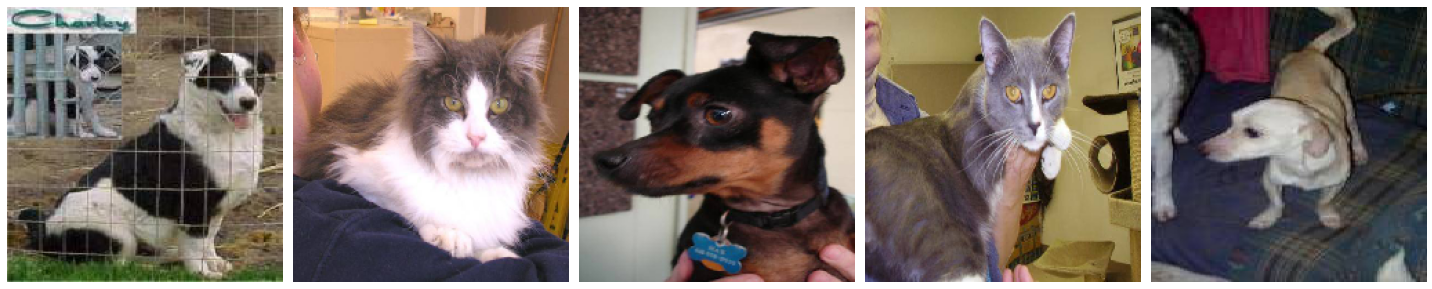

['dog', 'cat', 'dog', 'cat', 'dog']


In [ ]:
# Insert your code here to obtain a sample training images batch from the train directory generator

sample_training_images, label = next(traindir)
visualize_image(sample_training_images[:5],label[:5])
    

# Build Model

---
Now build the model as per the best dropout probability value determined earlier. Summarize the model architecture.

---

**2 Points**

---




In [ ]:
# Insert your code here to build the CNN model as per the best dropout probability value determined earlier
model = build_cnn_model(best_prob)

# Insert your code here to print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 67712)            

# Training the Model

---
Train the model built with best hyperparameter settings. Generate a **Plot** of Epochs Vs. training and validation accuracy. Also generate a similar plot for training and validation loss. Discuss your **inferences** from the plot.


---

**7 Points**


---



In [ ]:
# Insert your code here to train the CNN model with best hyperparameter settings using training set and validate using the validation set (1 Point)
history = model.fit_generator(traindir,steps_per_epoch=total_train_data // best_batch_size,epochs=num_epochs,validation_data=validdir,validation_steps=total_val_data // best_batch_size)






#rest below this 






Epoch 1/5
15/31 [=============>................] - ETA: 1:04 - loss: 0.6940 - accuracy: 0.5135

validation acc= [0.5258620977401733, 0.5366379022598267, 0.5969827771186829, 0.5969827771186829, 0.6174569129943848]
train ac= [0.5182926654815674, 0.5428427457809448, 0.5472561120986938, 0.5528455376625061, 0.5818089246749878]
train loss= [0.6932013630867004, 0.686858594417572, 0.683715283870697, 0.683040976524353, 0.675959050655365]
epochs= range(0, 5)


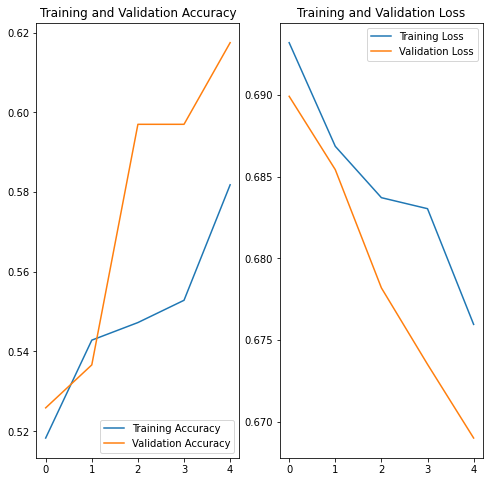

In [ ]:
# Insert your code here to obtain the lists: epochs, training accuracy, validation accuracy, training loss, validation loss (2 Points)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(num_epochs)
print("validation acc=",val_acc)
print("train ac=",acc)
print("train loss=",loss)
print("epochs=",epochs_range)

# Insert your code here to plot Epochs Vs. training and validation accuracy (2 Points)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Insert your code here to plot Epochs Vs. training and validation loss (2 Points)
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

as the no of epochs increases the training acc increases.
And training loss and validation loss keeps on decreasing as epocs increases.

# Prediction

---
Fetch a sample test batch and determine the model's predictions on this batch of test images. Generate a confusion matrix and comment on the prediction statistics.



---

**Note**: Predictions would return the probability of the image belonging to class 1 (Dog). If this value is more than 0.5, assign class 1 (Dog) as the prediction. Else, assign class 0(Cat) as the prediction.

---
**2 Points**

---





In [ ]:
# Insert your code here to obtain a sample test images batch from the test directory generator
sample_test_images, label = next(testdir)

result=model.predict(sample_test_images)
# Insert your code here to get the model's prediction probabilities
print(result)
result[result>0.5]=(1)
result[result<=0.5]=(0)
print(result)
# Insert your code here to assign class label based on prediction probabilities
print("confusion_matrix=")

# Insert your code here to print the confusion matrix.
print(confusion_matrix(label,result))



ERROR! Session/line number was not unique in database. History logging moved to new session 61
[[0.48265338]
 [0.49401453]
 [0.4499096 ]
 [0.51455885]
 [0.48546687]
 [0.4933171 ]
 [0.4499566 ]
 [0.4521967 ]
 [0.48421985]
 [0.49596363]
 [0.42581016]
 [0.44187006]
 [0.49182343]
 [0.5051938 ]
 [0.49786288]
 [0.4708067 ]
 [0.4764058 ]
 [0.534007  ]
 [0.5149098 ]
 [0.40855438]
 [0.4560552 ]
 [0.47178462]
 [0.5045779 ]
 [0.4762786 ]
 [0.47956127]
 [0.48854217]
 [0.5110862 ]
 [0.4748317 ]
 [0.579931  ]
 [0.5127184 ]
 [0.5078173 ]
 [0.5080551 ]]
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
confusion_matrix=
[[10  4]
 [12  6]]


Discuss the **inferences** you obtained from the confusion matrix.


---

**2 Points**


---

